# numpy save, simulation results
In this notebook, we graph all the graphs shown in the paper, including the CDF graph of the original unpertrubed data, the sensitivity graph, and the histographs for our sampling distributions.

In [1]:
#Variables to play with, eventually will be deprecated:
bin_number = 30


In [2]:
num_experiments = 100

In [3]:
#Import Statements & Define Constants
import spock
print(spock.__version__)

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import scipy.signal as signal

from scipy.stats import lognorm
from scipy.stats import ks_2samp
import math
import rebound
from random import choice

print(rebound.__version__)

import random
#from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
import itertools
from spock import FeatureClassifier
from decimal import Decimal
import pandas as pd
from tqdm import tqdm
from matplotlib.ticker import EngFormatter
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import statistics
import dispersion as disp
%matplotlib inline

fmodel = FeatureClassifier()
earth_mass = 5.97219*10**24
sun_mass = 1.981 * 10**30
mass_ratio = earth_mass/sun_mass

0.1.0.dev299+gc0f9412
4.4.2


# Load NASA Exoplanet Archive data needed
Use archive to find planets that have compact inner period ratios

In [15]:
# load data of planets that have inner period ratio 1.1-1.5
df = pd.read_csv("compact_planet_data_2024.csv", index_col=0)
#print(df["Mass or Mass * sin(i) (M_earth)"].values)
#print(df['Stellar Mass (M_sun)'].values)
#print(df["Star/Planet Ratio"].values)
#print(df.head())
huh = df["Planet Name"].unique()
print(len(huh))
lol = np.load("spocktestmasses.npy")
bruh = np.load("spocktesteccens.npy")
#df.head()
print(bruh)

164
[0.      0.      0.      0.0425  0.      0.01007 0.      0.      0.
 0.      0.      0.      0.02    0.      0.027   0.      0.01    0.
 0.      0.001   0.      0.      0.      0.      0.      0.      0.
 0.027   0.      0.      0.002   0.      0.02    0.      0.      0.
 0.02    0.      0.      0.      0.      0.      0.03    0.01    0.017
 0.      0.017   0.03    0.      0.      0.      0.002   0.      0.02
 0.      0.07    0.      0.      0.      0.00208 0.      0.      0.
 0.      0.045   0.02    0.      0.      0.11    0.      0.      0.001
 0.      0.      0.      0.      0.03    0.      0.      0.02    0.012
 0.03    0.      0.      0.027   0.      0.      0.15    0.      0.
 0.      0.      0.002   0.      0.      0.      0.      0.014   0.
 0.      0.002   0.      0.      0.      0.      0.      0.021   0.07
 0.02    0.      0.      0.02    0.      0.      0.      0.      0.
 0.      0.      0.      0.16    0.      0.      0.00208 0.      0.094
 0.089   0.      0.      0. 

152
0
[ 0.  5. 10. 15. 20. 25.]


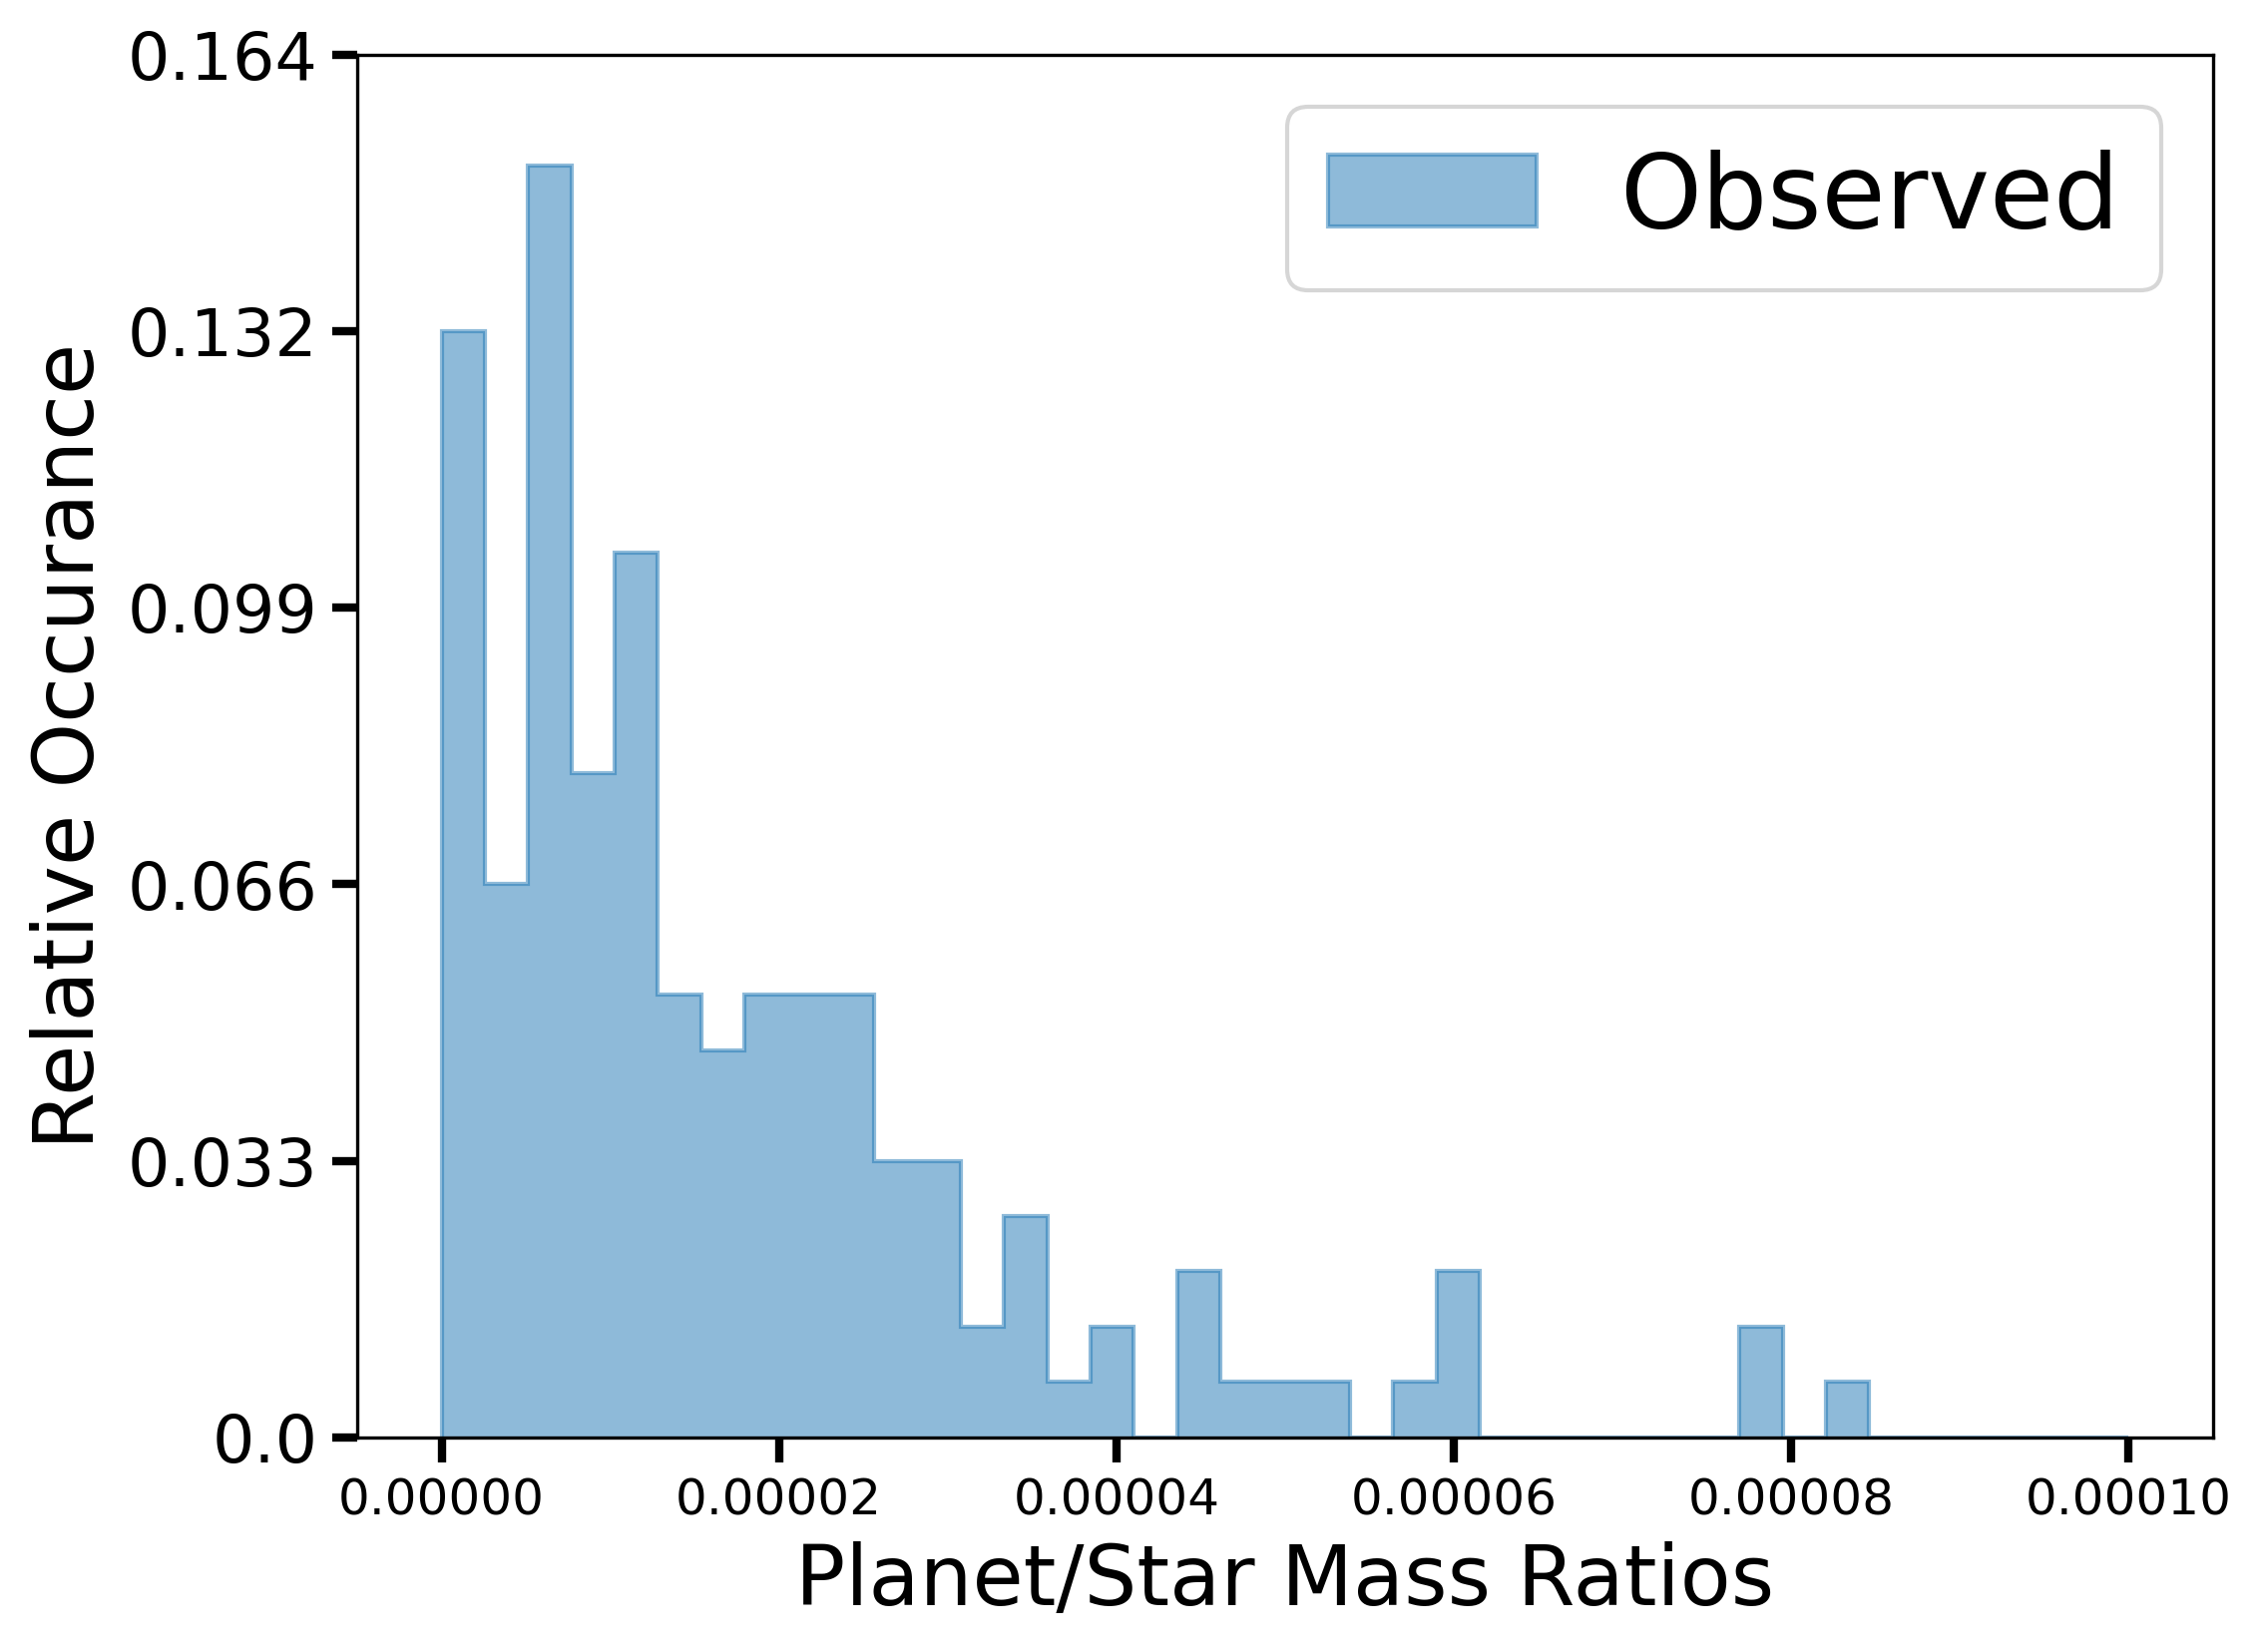

In [16]:
df["Star/Planet Ratio"] = (df['Stellar Mass (M_sun)'].to_numpy()/df["Mass or Mass * sin(i) (M_earth)"].to_numpy())**(-1)
plt.style.use('./paper.mplstyle')
huh, ax = plt.subplots(figsize=(8,6), dpi=300)

#print(df["Mass or Mass * sin(i) (M_earth)"].values)
#print(df['Stellar Mass (M_sun)'].values)
#print(df["Star/Planet Ratio"].values)
ratios = df["Star/Planet Ratio"].to_numpy()
ratios = ratios[~np.isnan(ratios)]
ratios = ratios*(3*10**(-6))
ratios = ratios[ratios<0.0001]
print(len(ratios))
#print([ratios,ratios.max()])
ratiogaussian = gaussian_kde(ratios) 
#print(type(ratiogaussian))
ratlist = ratiogaussian.resample(size=150000)[0]
ratlist = np.array([choice(ratios) for n in range(0,15000)])

ratlist = ratlist[ratlist > 0]
print(len(ratlist[ratlist<0]))
#plt.plot(np.linspace(0, 1.5, 40), kde(x_grid), label='Observed KDE')

n, bins_e, patches = plt.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=False,stacked = False 
                              ,label = 'Observed')

#print( plt.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=True, label = 'Observed'))
plt.xticks(fontsize=12)
locs, _ = plt.yticks() 
print(locs)
plt.yticks(locs,np.round(locs/len(ratios),3))
plt.legend(fontsize="25")
plt.xlabel("Planet/Star Mass Ratios")
plt.ylabel("Relative Occurance")

plt.savefig('ObservedPlanetStarRatios.pdf',bbox_inches='tight')

[ 0.  5. 10. 15. 20. 25. 30.]


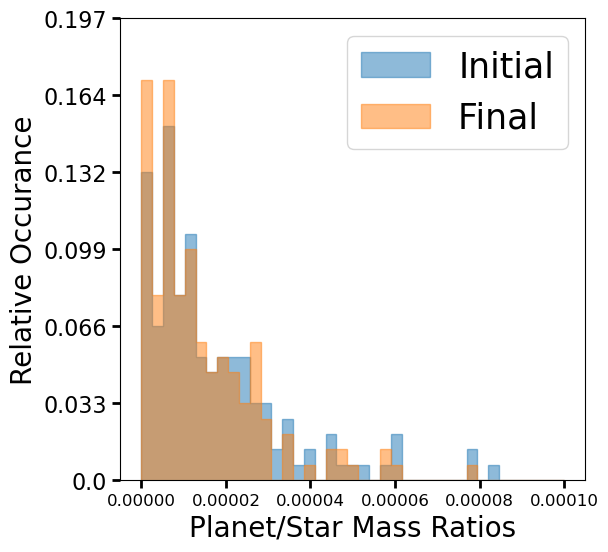

In [17]:
n, bins_e, patches = plt.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=False,stacked = False,label = 'Initial')
n1, bins1, patches1 = plt.hist(lol, bins=bins_e, histtype='step', fill=True, alpha=0.5, density=False, label = 'Final ')
plt.style.use('./paper.mplstyle')
plt.xticks(fontsize=12)
locs, _ = plt.yticks() 
print(locs)
plt.yticks(locs,np.round(locs/len(ratios),3))
plt.legend(fontsize="25")
plt.xlabel("Planet/Star Mass Ratios")
plt.ylabel("Relative Occurance")

plt.savefig('ComparisonPlanetStarRatio.pdf',bbox_inches='tight')

[ 0. 10. 20. 30. 40. 50. 60. 70.]


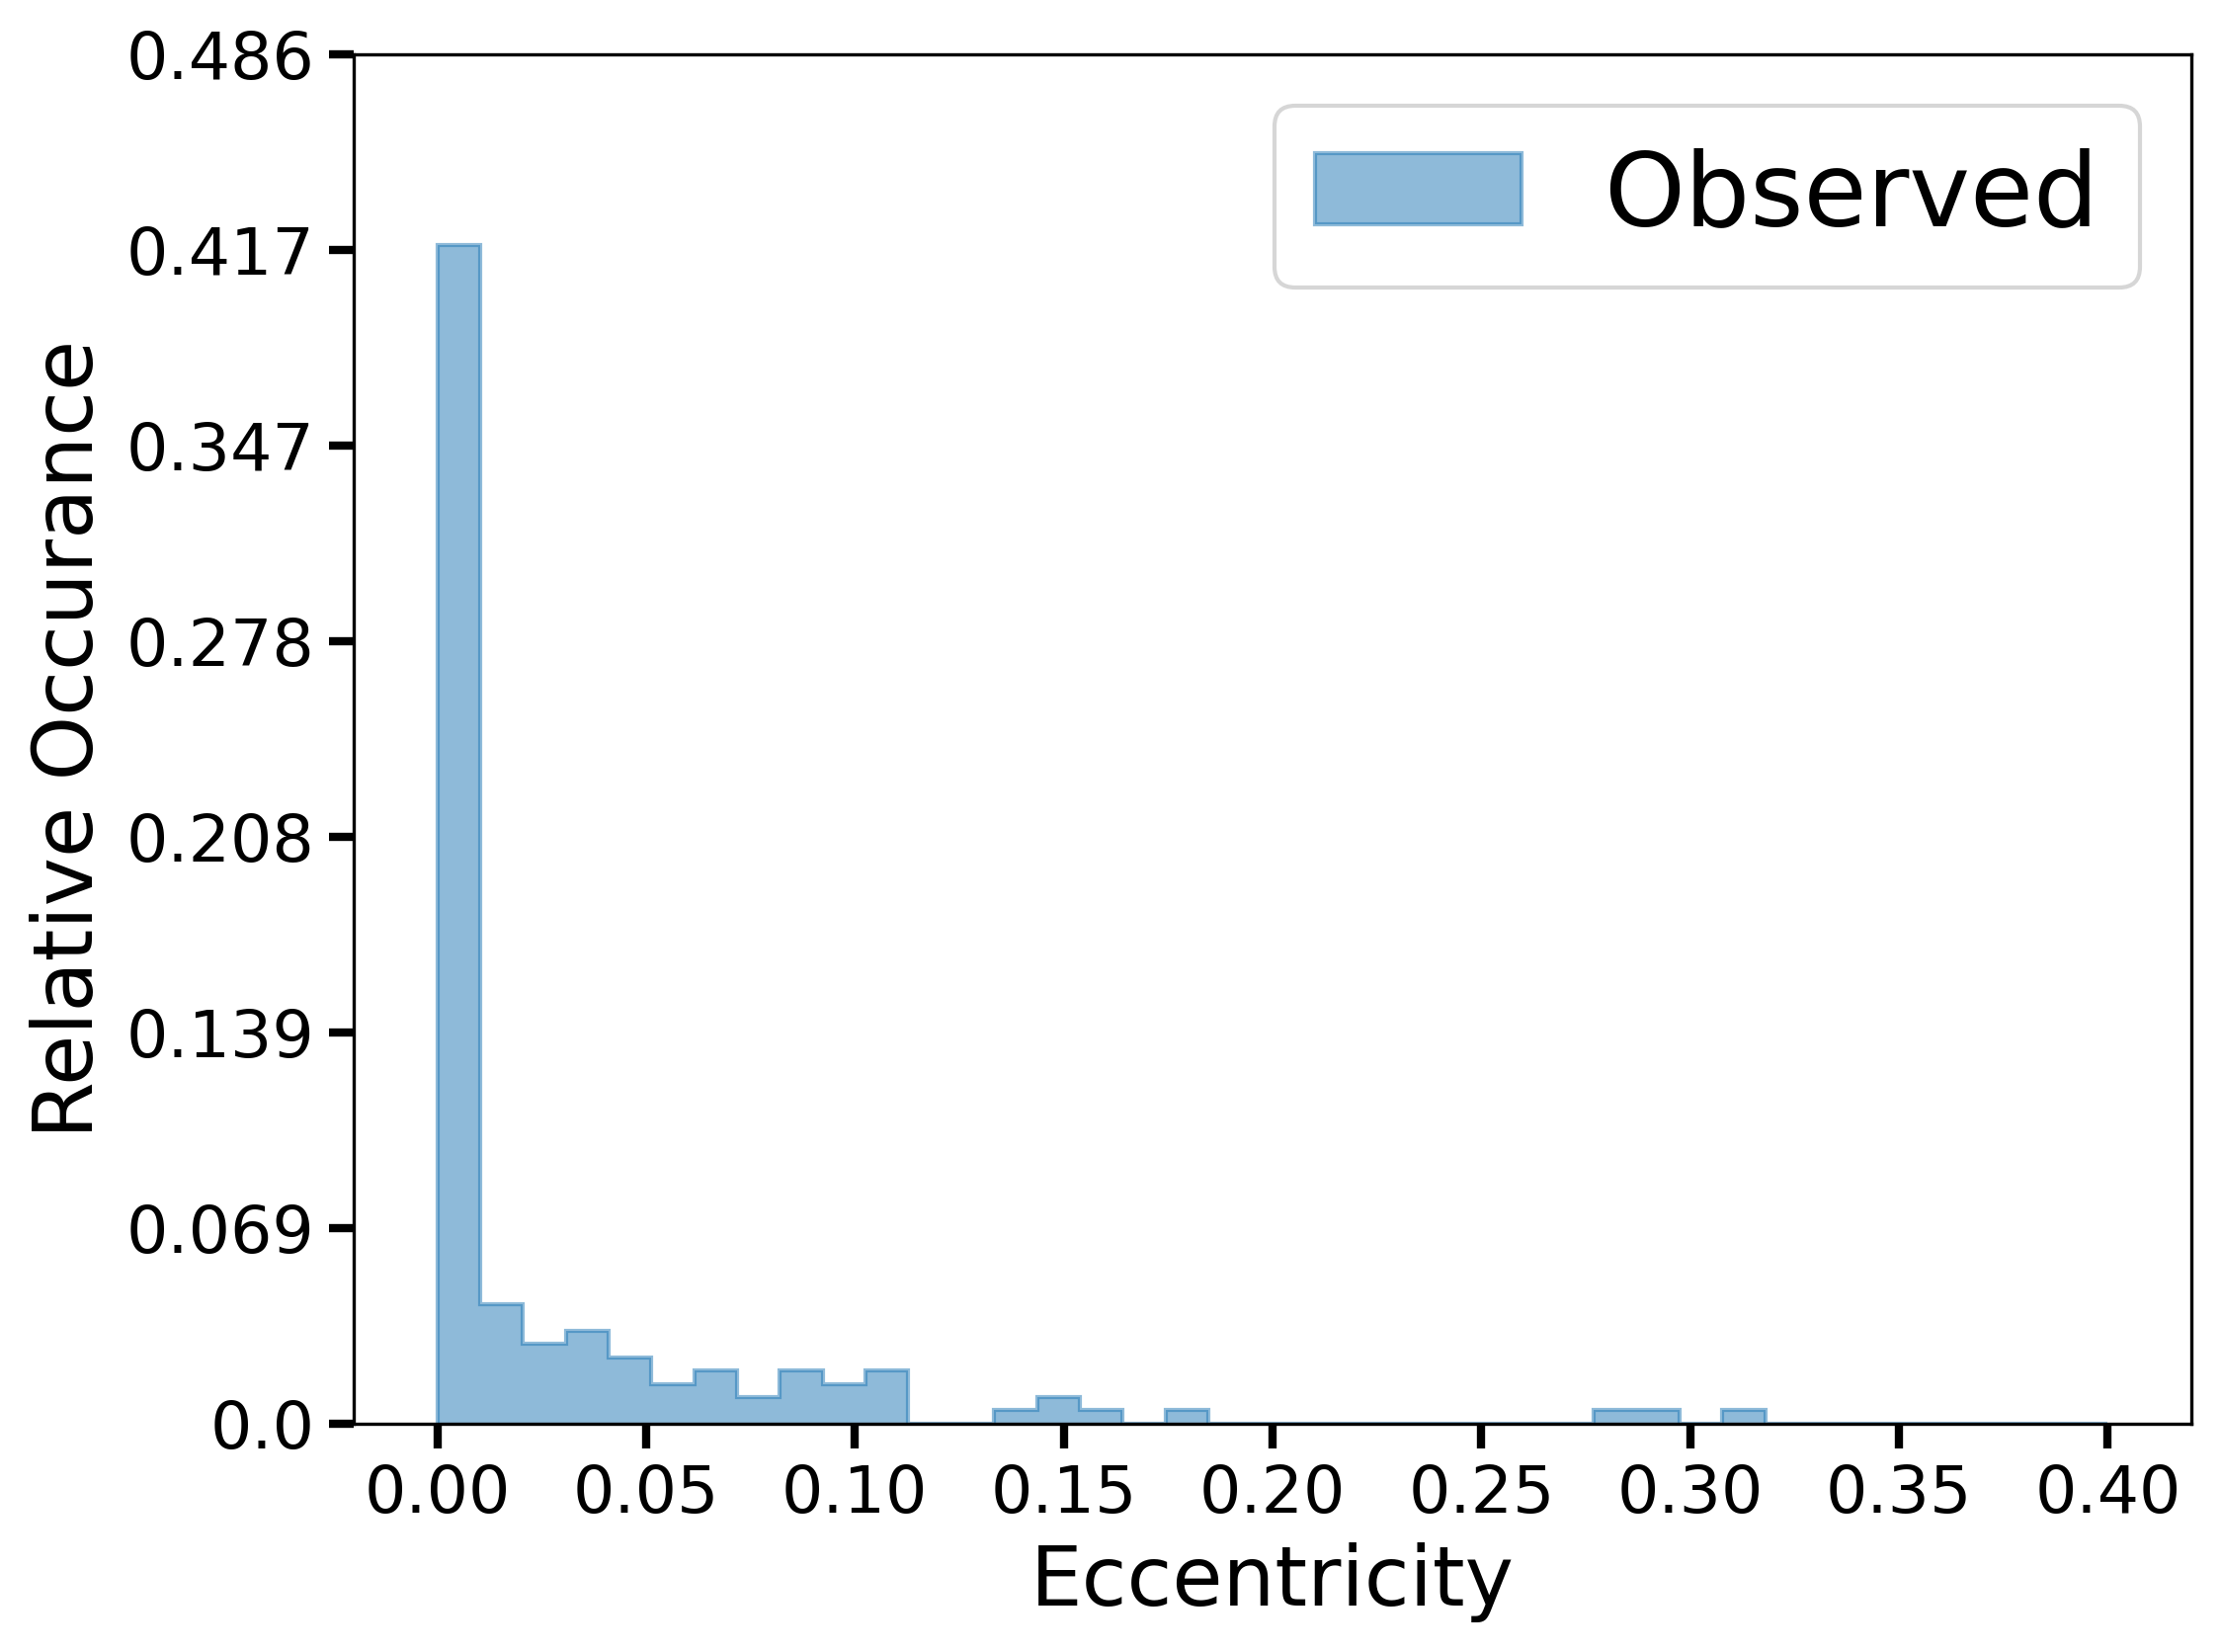

In [18]:
huh, ax = plt.subplots(figsize=(8,6), dpi=300)
# Load the data
eccentricity = df['Eccentricity'].to_numpy()
plt.style.use('./paper.mplstyle')
# Remove NaN and infinite values from the array
eccentricity = eccentricity[~np.isnan(eccentricity)]
#eccentricity = eccentricity[eccentricity != 0]
eccentricity = eccentricity[np.isfinite(eccentricity)]

# Fit a KDE to the data
kde_e = gaussian_kde(eccentricity)

# Generate 10000 samples from the KDE
e_list = kde_e.resample(size=150000)[0] #change eccentricity to be half of kde see how much change
e_list = np.array([choice(eccentricity) for n in range(0,150000)])
n, bins_e, patches = plt.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step',fill=True, alpha=0.5, density=True, label = 'Observed')


# Set plot title, labels, and legend
#plt.title("Observed vs. Resampled Eccentricity Distribution, using random sampling")
locs, _ = plt.yticks() 
print(locs)
plt.yticks(locs,np.round(locs/len(eccentricity),3))
plt.xlabel("Eccentricity")
plt.ylabel("Relative Occurance")
plt.legend(fontsize="25")

# Show the plot
plt.savefig('ObservedEccentricity.pdf',bbox_inches='tight')
plt.show()

[  0.  20.  40.  60.  80. 100. 120. 140.]


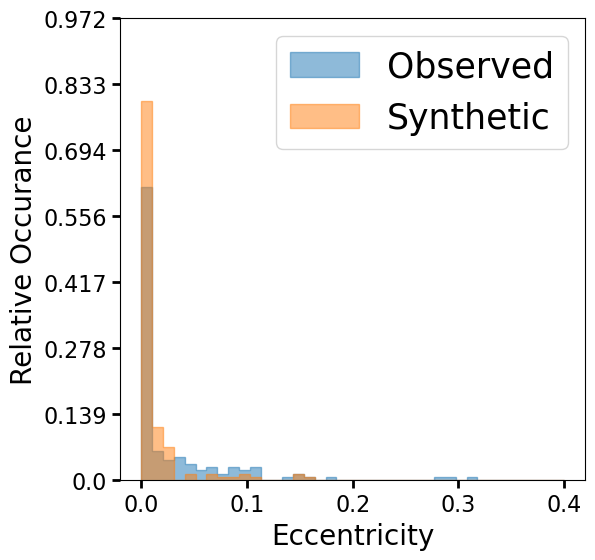

In [19]:
n, bins_e, patches = plt.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step',fill=True, alpha=0.5, density=False, label = 'Observed')
# Plot the kernel density curve of the original data
#Create a histogram of the new samples
n_new, bins_new, patches_new = plt.hist(bruh, bins=bins_e, histtype='step', fill=True, density=False, alpha=0.5,label = 'Synthetic')
#n2, bins_e2, patches2 = plt.hist(e_list_orig, bins=bins_e, histtype='step', density=True, fill=True,alpha=0.5, label = 'resampled')
plt.style.use('./paper.mplstyle')
# Plot the kernel density curve of the new samples, e_list spock selected from
kde_new_e = gaussian_kde(e_list)
#plot the actual eccentricities spock took
'''
n_s_new, bins_s_new, patches_s_new = plt.hist(spock_e_list, bins=bins_e, histtype='step', density=True, label = 'Spock Population')
kde_s_new = gaussian_kde(spock_e_list)
plt.plot(x_grid_e, kde_s_new(x_grid_e), label='Spock Population KDE')
'''

# Set plot title, labels, and legend
#plt.title("Observed vs. Resampled Eccentricity Distribution, using random sampling")
locs, _ = plt.yticks() 
print(locs)
plt.yticks(locs,np.round(locs/len(eccentricity),3))
plt.xlabel("Eccentricity")
plt.ylabel("Relative Occurance")
plt.legend(fontsize="25")

# Show the plot
plt.savefig('ComparsionEccentricity.pdf',bbox_inches='tight')
plt.show()

[  0.  25.  50.  75. 100. 125.]
[ 0.  5. 10. 15. 20. 25. 30.]


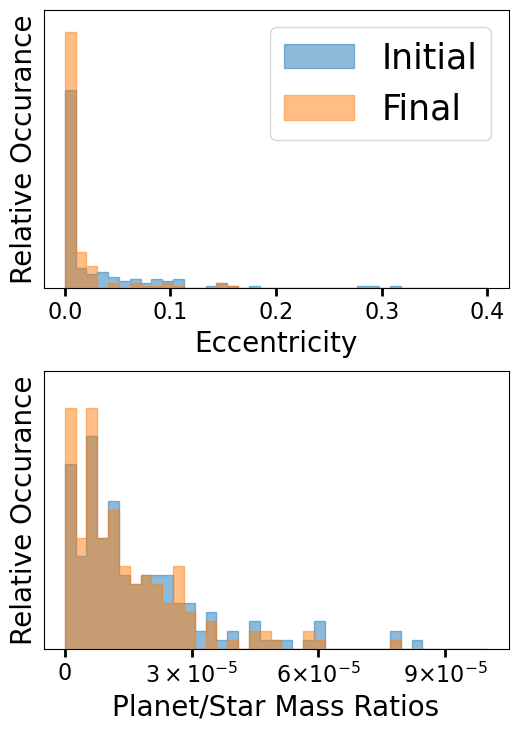

In [20]:
plt.style.use('./paper.mplstyle')
fig, axarr = plt.subplots(figsize=(6,8.3), nrows=2)
fig.subplots_adjust(hspace=0.3)


ax = axarr[0]
bx = axarr[1]


n, bins_e, patches = ax.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step',fill=True, alpha=0.5, density=False, label = 'Initial')
# Plot the kernel density curve of the original data
#Create a histogram of the new samples
n_new, bins_new, patches_new = ax.hist(bruh, bins=bins_e, histtype='step', fill=True, density=False, alpha=0.5,label = 'Final')

# Set plot title, labels, and legend
#plt.title("Observed vs. Resampled Eccentricity Distribution, using random sampling")
locs = ax.get_yticks() 
print(locs)
ax.set_yticks(locs,np.round(locs/len(eccentricity),3))
ax.set_xlabel("Eccentricity")
ax.set_yticks([])
ax.set_ylabel("Relative Occurance")
ax.legend(fontsize="25")

n, bins_e, patches = bx.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=False,stacked = False,label = 'Initial')
n1, bins1, patches1 = bx.hist(lol, bins=bins_e, histtype='step', fill=True, alpha=0.5, density=False, label = 'Final ')

#print( plt.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=True, label = 'Observed'))
#bx.set_xticks(fontsize=12)
locs = bx.get_yticks() 
bx.ticklabel_format(axis = "x", style = "sci")
print(locs)
bx.set_xticks([0,3e-5,6e-5,9e-5])
bx.set_xticklabels([r"$0$",r"$3\times 10^{-5}$",r"6$\times 10^{-5}$",r"9$\times 10^{-5}$"])
bx.set_yticks(locs,np.round(locs/len(ratios),3))
#bx.legend(fontsize="25")
bx.set_xlabel("Planet/Star Mass Ratios")
bx.set_ylabel("Relative Occurance")
bx.set_yticks([])
fig.savefig('testestest.pdf',bbox_inches='tight')

[  0.  20.  40.  60.  80. 100.]
[ 0.  5. 10. 15. 20. 25.]


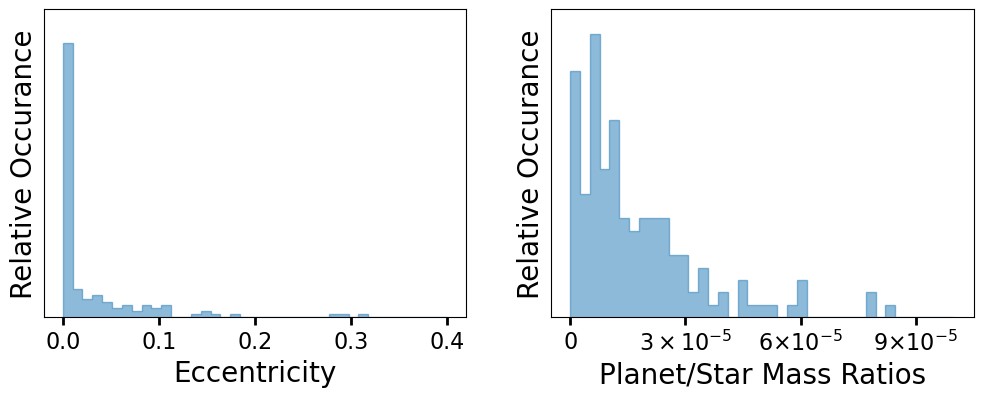

In [21]:
plt.style.use('./paper.mplstyle')
fig, axarr = plt.subplots(figsize=(12,4), ncols=2)

ax = axarr[0]
bx = axarr[1]


n, bins_e, patches = ax.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step',fill=True, alpha=0.5, density=False, label = 'Observed')


# Set plot title, labels, and legend
#plt.title("Observed vs. Resampled Eccentricity Distribution, using random sampling")
locs = ax.get_yticks() 
print(locs)
ax.set_yticks(locs,np.round(locs/len(eccentricity),3))
ax.set_xlabel("Eccentricity")
ax.set_yticks([])
ax.set_ylabel("Relative Occurance")
#ax.legend(fontsize="25")


n, bins_e, patches = bx.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=False,stacked = False 
                              ,label = 'Observed')

#print( plt.hist(ratios, bins=np.linspace(0, 0.0001, 40), histtype='step',fill=True, alpha=0.5, density=True, label = 'Observed'))
#bx.set_xticks(fontsize=12)
locs = bx.get_yticks() 
bx.ticklabel_format(axis = "x", style = "sci")
print(locs)
bx.set_xticks([0,3e-5,6e-5,9e-5])
bx.set_xticklabels([r"$0$",r"$3\times 10^{-5}$",r"6$\times 10^{-5}$",r"9$\times 10^{-5}$"])
bx.set_yticks(locs,np.round(locs/len(ratios),3))
#bx.legend(fontsize="25")
bx.set_xlabel("Planet/Star Mass Ratios")
bx.set_ylabel("Relative Occurance")
bx.set_yticks([])
fig.savefig('testestest.pdf',bbox_inches='tight')

# load from prelim .npy

In [23]:
pratios_observed = (np.load('observed_periods_2024.npy'))
print(pratios_observed)

[1.19361856 1.42000817 1.38685146 1.38194556 1.33336858 1.33394709
 1.34196578 1.26431296 1.49194568 1.45262456 1.48377863 1.30096463
 1.3538943  1.46480102 1.41193039 1.44760052 1.45443877 1.4027205
 1.39140811 1.48056441 1.24417625 1.35866415 1.33751443 1.45823722
 1.26399713 1.41063722 1.45904324 1.30784238 1.27637229 1.33627126
 1.3661322  1.29105027 1.1747799  1.3474565  1.49087292 1.46063336
 1.38283711 1.33328639 1.35741159 1.40520358 1.41166672 1.4081327
 1.47917006 1.43959088 1.48311202 1.45960959 1.290854   1.46954031
 1.40388468 1.45999146 1.46673817 1.42600848 1.45654853 1.26025515
 1.27928855 1.36987246 1.26270865 1.36153757 1.25109106 1.25789305
 1.25027336 1.33406214 1.45993393 1.38759517 1.47797058 1.35038696
 1.47639239 1.43191287 1.40771659 1.49960457 1.39997872 1.37068352
 1.34155768]


In [25]:
observed_period_cdf = np.load('observed_period_cdf.npy')
print(len(observed_period_cdf))

73


In [27]:
kde_changing = np.load('kde_changing.npy')
stdev_changing = np.load('stdev_changing.npy')
print(kde_changing)

[0.5        0.57434918 0.65975396 0.75785828 0.87055056 1.
 1.14869835 1.31950791 1.51571657 1.74110113 2.        ]


In [45]:
e_list = np.load('e_list.npy')
m_list = np.load('m_list.npy')
eccentricity = e_list
mass= m_list

In [28]:
spock_p_base = np.load('SPOCK_p_base.npy')
print(len(spock_p_base))

FileNotFoundError: [Errno 2] No such file or directory: 'SPOCK_p_base.npy'

# waldo copy above here

# Dispersion for observed systems
D = 0.302449556680029

error = 0.0180067880312394 (SEM)

In [29]:
D = 0.302449556680029
D_error = 0.0180067880312394

# notes
kde_changing should be an array of multipliers for e_list and m_list, length 11

trials_pvalue should be an array of length num_experiments (=100) holding a pvalue for when the 71 systems are compared to observesd

In [34]:
#allpval = np.load('EccenChangePvalsSPOCK.npy')
masspval = np.load('MassRatioChangePvals.npy')
eccenpval = np.load('EccenhangePvals.npy')
stdevpval = np.load('STDEVChangingPvals.npy')
bruh = np.load("NormPV.npy")
print(bruh[0])
kde_changing = [0.5, 0.57434918, 0.65975396, 0.75785828, 0.87055056, 1.14869835, 1.31950791, 1.51571657, 1.74110113,2]

#print(allpval)
def averagemaking(pvallist):
    listofavg = []
    listofstdev = []    
    #kde_changing = [0.5, 0.57434918, 0.65975396, 0.75785828, 0.87055056, 1, 1.14869835, 1.31950791, 1.51571657, 1.74110113, 2]
    for i in range(0,len(pvallist)):
        #bruh = np.load("ZeroEccenPval"+str(kde_changing[i])+".npy")
        #print("\nThe Factor is "+str(kde_changing[i]))
        #print("Pomega Pval is "+str(np.asarray(bruh).mean()))
        #print("Original Pval is " +str(np.asarray(ecc_pvalue[i]).mean()))
        listofavg.append(np.asarray(pvallist[i]).mean())
        listofstdev.append(np.asarray(pvallist[i]).std()) 
    #rint(listofavg) 
    return [listofavg,listofstdev]
    #print(listofstdev)

massratiopval = averagemaking(masspval)
eccenpval = averagemaking(eccenpval)
stdevpval = averagemaking(stdevpval)
print(averagemaking(bruh)[0])

[0.50281331 0.89361078 0.27880292 0.27880292 0.38067242 0.00709758
 0.27880292 0.89361078 0.89361078 0.38067242 0.00249415 0.9815042
 0.49825808 0.96796311 0.50281331 0.27880292 0.56013715 0.03374627
 0.50281331 0.77678922 0.95044747 0.96796311 0.19807442 0.6393545
 0.6393545  0.70149032 0.56013715 0.89361078 0.77678922 0.87153524
 0.96796311 0.38067242 0.89361078 0.38067242 0.89361078 0.76778048
 0.19807442 0.77678922 0.02328141 0.1245565  0.03783216 0.96796311
 0.55800793 0.47408939 0.99600825 0.1366818  0.47408939 0.19807442
 0.89361078 0.89361078 0.18195142 0.50281331 0.1245565  0.19807442
 0.77678922 0.03374627 0.1366818  0.43420405 0.77678922 0.38067242
 0.92249317 0.57796935 0.25824631 0.50281331 0.89361078 0.6393545
 0.50281331 0.23547122 0.47408939 0.38067242 0.47408939 0.50281331
 0.50281331 0.38067242 0.66243689 0.1366818  0.89361078 0.77678922
 0.77678922 0.38067242 0.38067242 0.50281331 0.96796311 0.57796935
 0.3556661  0.50281331 0.08289108 0.05973413 0.18195142 0.9819919

10
10


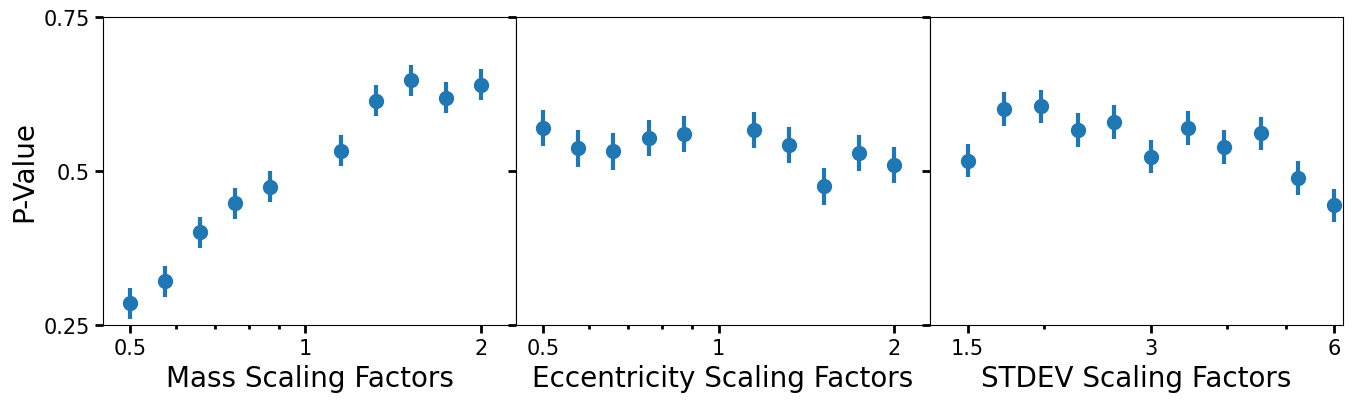

In [35]:
plt.style.use('./paper.mplstyle')
fig, axarr = plt.subplots(figsize=(16,4), ncols=3, sharey=True)
fig.subplots_adjust(wspace=0)


print(len(kde_changing))
#print(len(listofavg))
#ax.errorbar(kde_changing, ecc_trials_pvalue_mean, yerr=ecc_trials_pvalue_stdev[0]/10,fmt='o')

ax = axarr[0]
bx = axarr[1]
cx = axarr[2]
print(len(kde_changing))

ax.errorbar(kde_changing, massratiopval[0], yerr=massratiopval[1][0]/10,fmt='o')
ax.set_xscale("log")
# plt.xticks(kde_changing)
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([.5, 1, 2], labels=[.5, 1, 2], fontsize=15)
ax.set_yticks([0.25,0.5,0.75], labels=[0.25,0.5,0.75], fontsize=15)
ax.set_ylim([.25,.75])
ax.set_ylabel("P-Value", fontsize = 20)
ax.set_xlabel('Mass Scaling Factors') 
ax.set_xlim([.45,2.3])
bx.errorbar(kde_changing, eccenpval[0], yerr=eccenpval[1][0]/10,fmt='o')
bx.set_xscale("log")
# plt.xticks(kde_changing)
#from matplotlib.ticker import StrMethodFormatter, NullFormatter
bx.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
bx.xaxis.set_minor_formatter(NullFormatter())
bx.set_xticks([.5, 1, 2], labels=[.5, 1, 2], fontsize=15)
bx.set_yticks([0.25,0.5,0.75], labels=[0.25,0.5,0.75], fontsize=15)
bx.set_ylim([.25,.75])
#bx.set_ylabel("P-Value", fontsize = 20)
bx.set_xlabel('Eccentricity Scaling Factors') 
bx.set_xlim([.45,2.3])
cx.errorbar(stdev_changing, stdevpval[0], yerr=stdevpval[1][0]/10,fmt='o')
cx.set_xscale("log")
# plt.xticks(kde_changing)
#from matplotlib.ticker import StrMethodFormatter, NullFormatter
cx.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
cx.xaxis.set_minor_formatter(NullFormatter())
cx.set_xticks([1.5, 3, 6], labels=[1.5, 3, 6], fontsize=15)
cx.set_yticks([0.25,0.5,0.75], labels=[0.25,0.5,0.75], fontsize=15)
cx.set_ylim([.25,.75])
cx.set_xlim([1.3,6.2])
#bx.set_ylabel("P-Value", fontsize = 20)
cx.set_xlabel('STDEV Scaling Factors') 
plt.savefig('Sensitvity.pdf',bbox_inches='tight')


NameError: name 'spock_p_base' is not defined

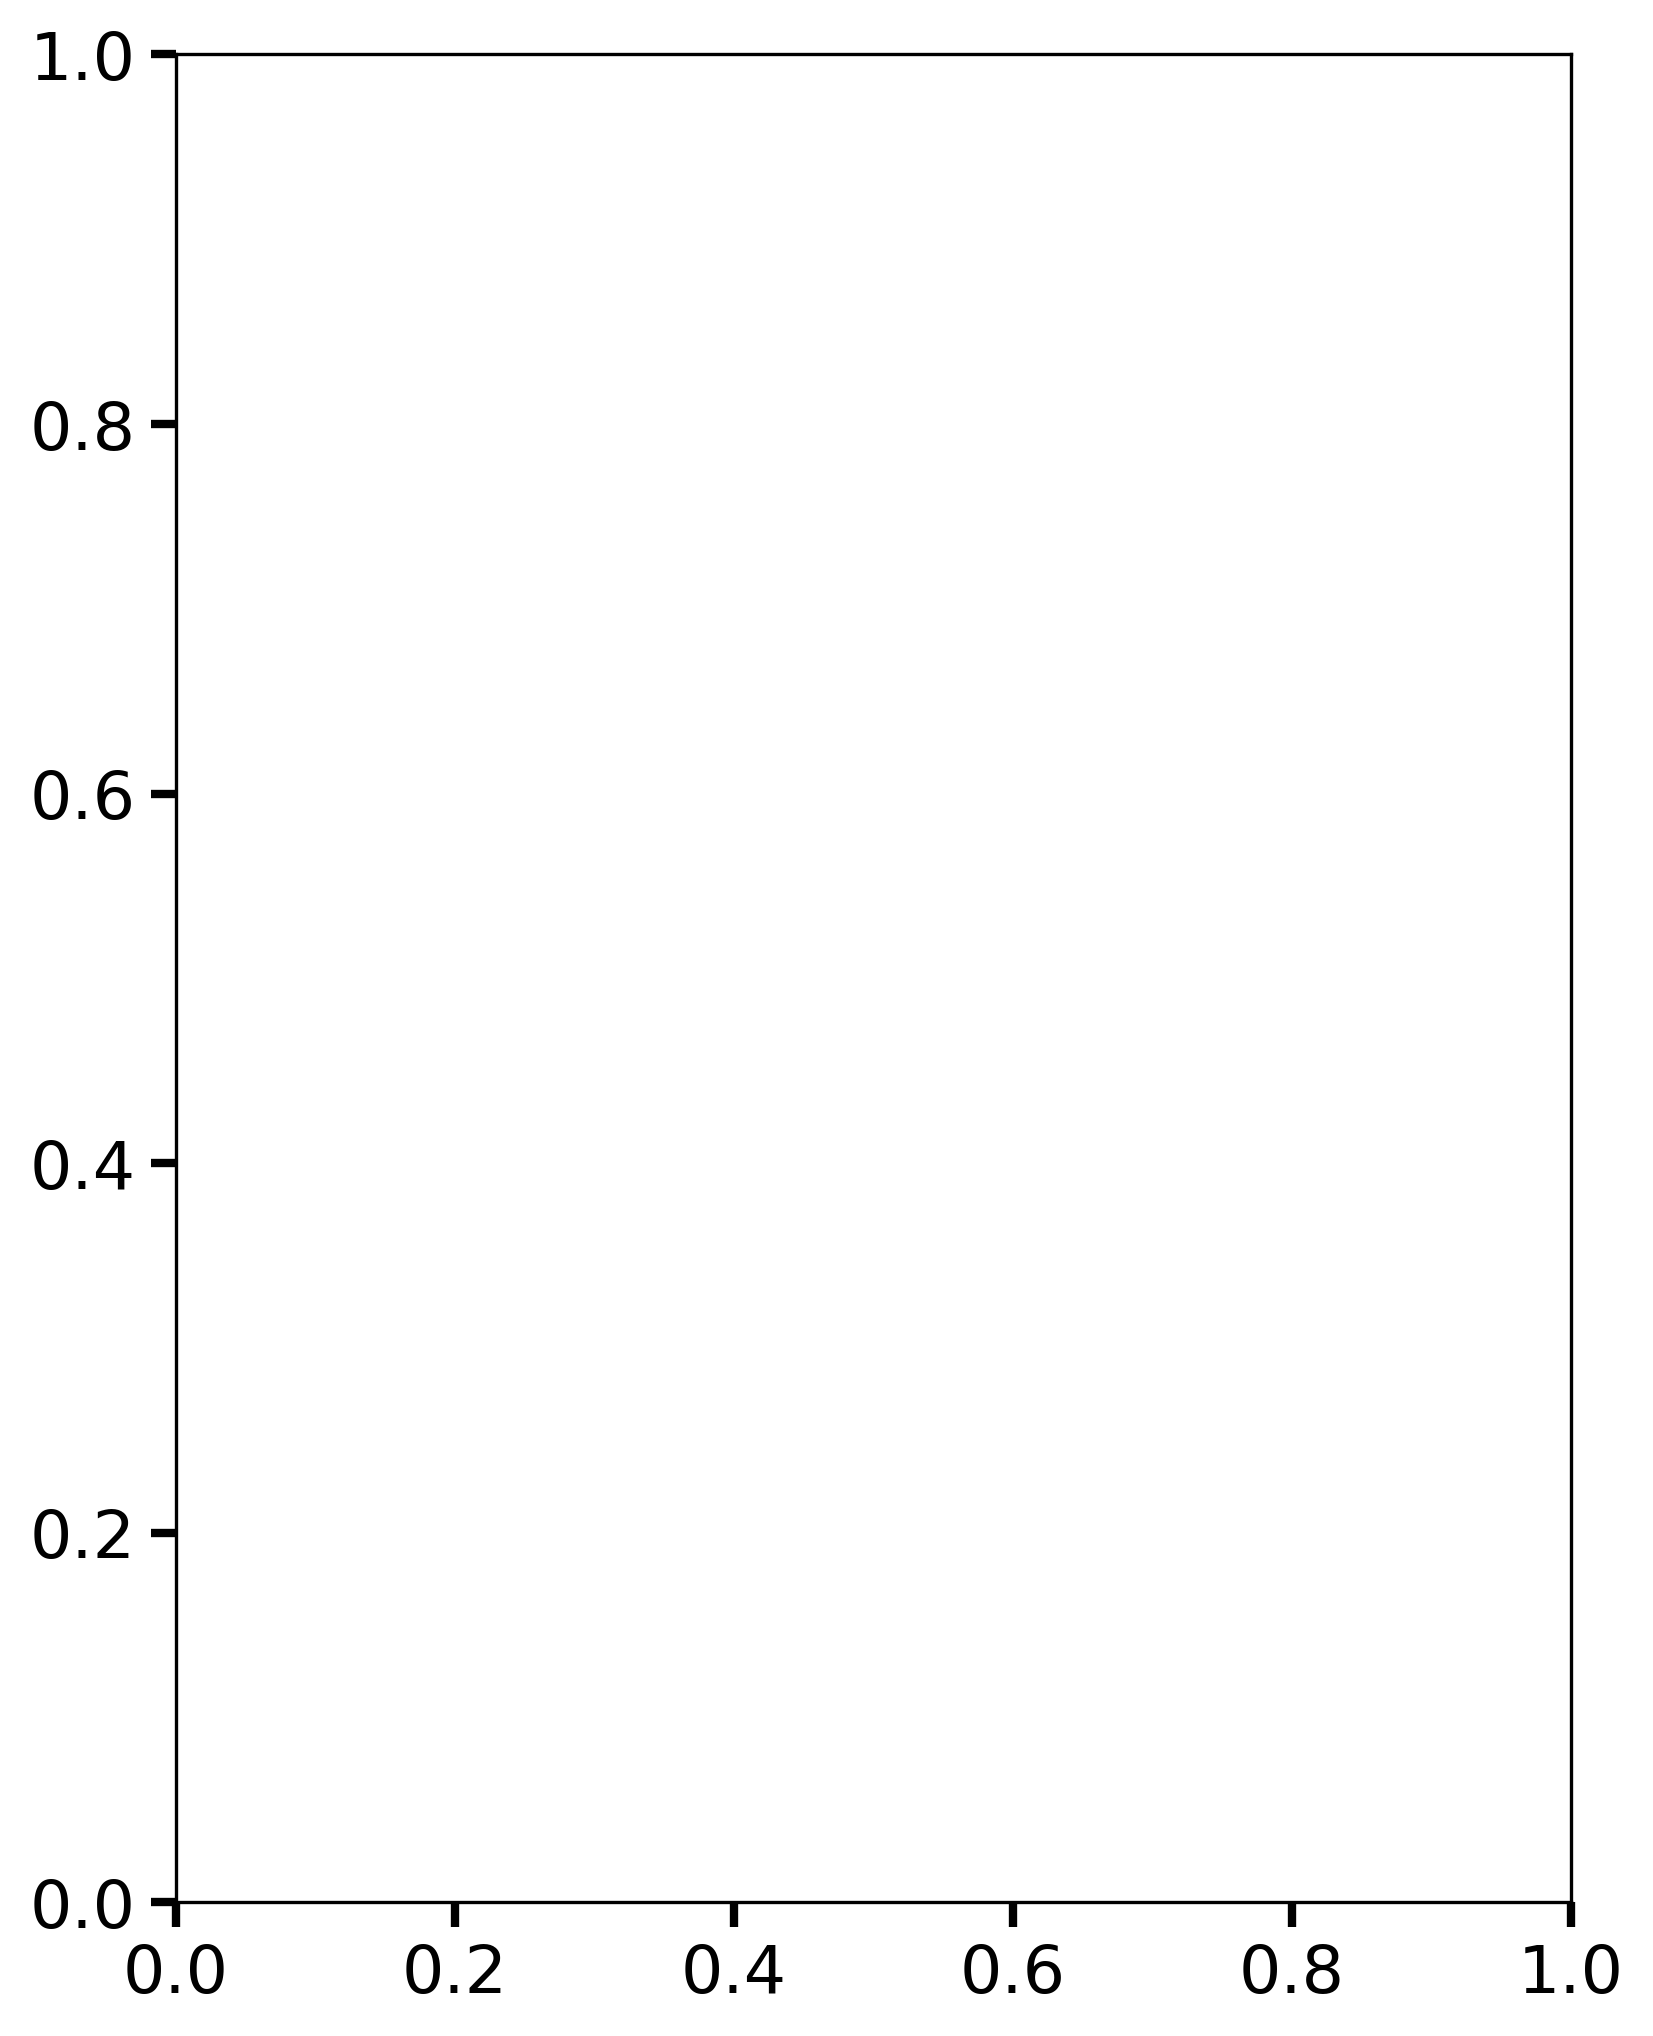

In [36]:
#Below we generate the plots for our population
plt.style.use('./paper.mplstyle')
fig, ax = plt.subplots(figsize=(6,8), dpi=300)
ecc_cumsum2= np.load('SpockTestCumSum.npy')[0] 
print(spock_p_base)
print(ecc_cumsum2[0])

print(len(ecc_cumsum2[0]))
enum = 6 # normal conditions at 6
ax.plot([1,1.5], [0,1], 'g--', label='Simulated Initial Population')
for q in range(num_experiments):
    spock_p_cumsum = ecc_cumsum2[q] #diff cumsum each time
    if q == 0:
        ax.plot([1]+list(spock_p_base), [0]+[0]+list(spock_p_cumsum), c = 'orange', alpha = 0.04, label='Simulated Final Populations')
    else:
        ax.plot([1]+list(spock_p_base), [0]+[0]+list(spock_p_cumsum), c = 'orange', alpha = 0.04)
        
# plot observed, don't change
ax.plot([1] + list(sorted(pratios_observed)), [0]+list(observed_period_cdf), c = 'blue', label='Observed Population')
# mmrs

# ax.axvline(1.2, color='black', linestyle='--', alpha=0.3, label = "MMR")
# ax.axvline(1.25, color='black', linestyle='--', alpha=0.3)
# ax.axvline(1.33, color='black', linestyle='--', alpha=0.3)
ax.legend()
ax.set_xlabel("Period Ratio", fontsize=20)
ax.set_ylabel("Cumulative Fraction of Planet Pairs", fontsize=20)
ax.set_xlim([1.,1.5])
ax.set_facecolor(color = "#cdcdfb")
plt.arrow(1.15,0.3,0,-.2,width =0.005,color = "g")
plt.text(1.154,0.2,"Insta-\nbilities",fontsize = 17,rotation = 0 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.savefig('thefinalestgraph.pdf', bbox_inches='tight')

bruh


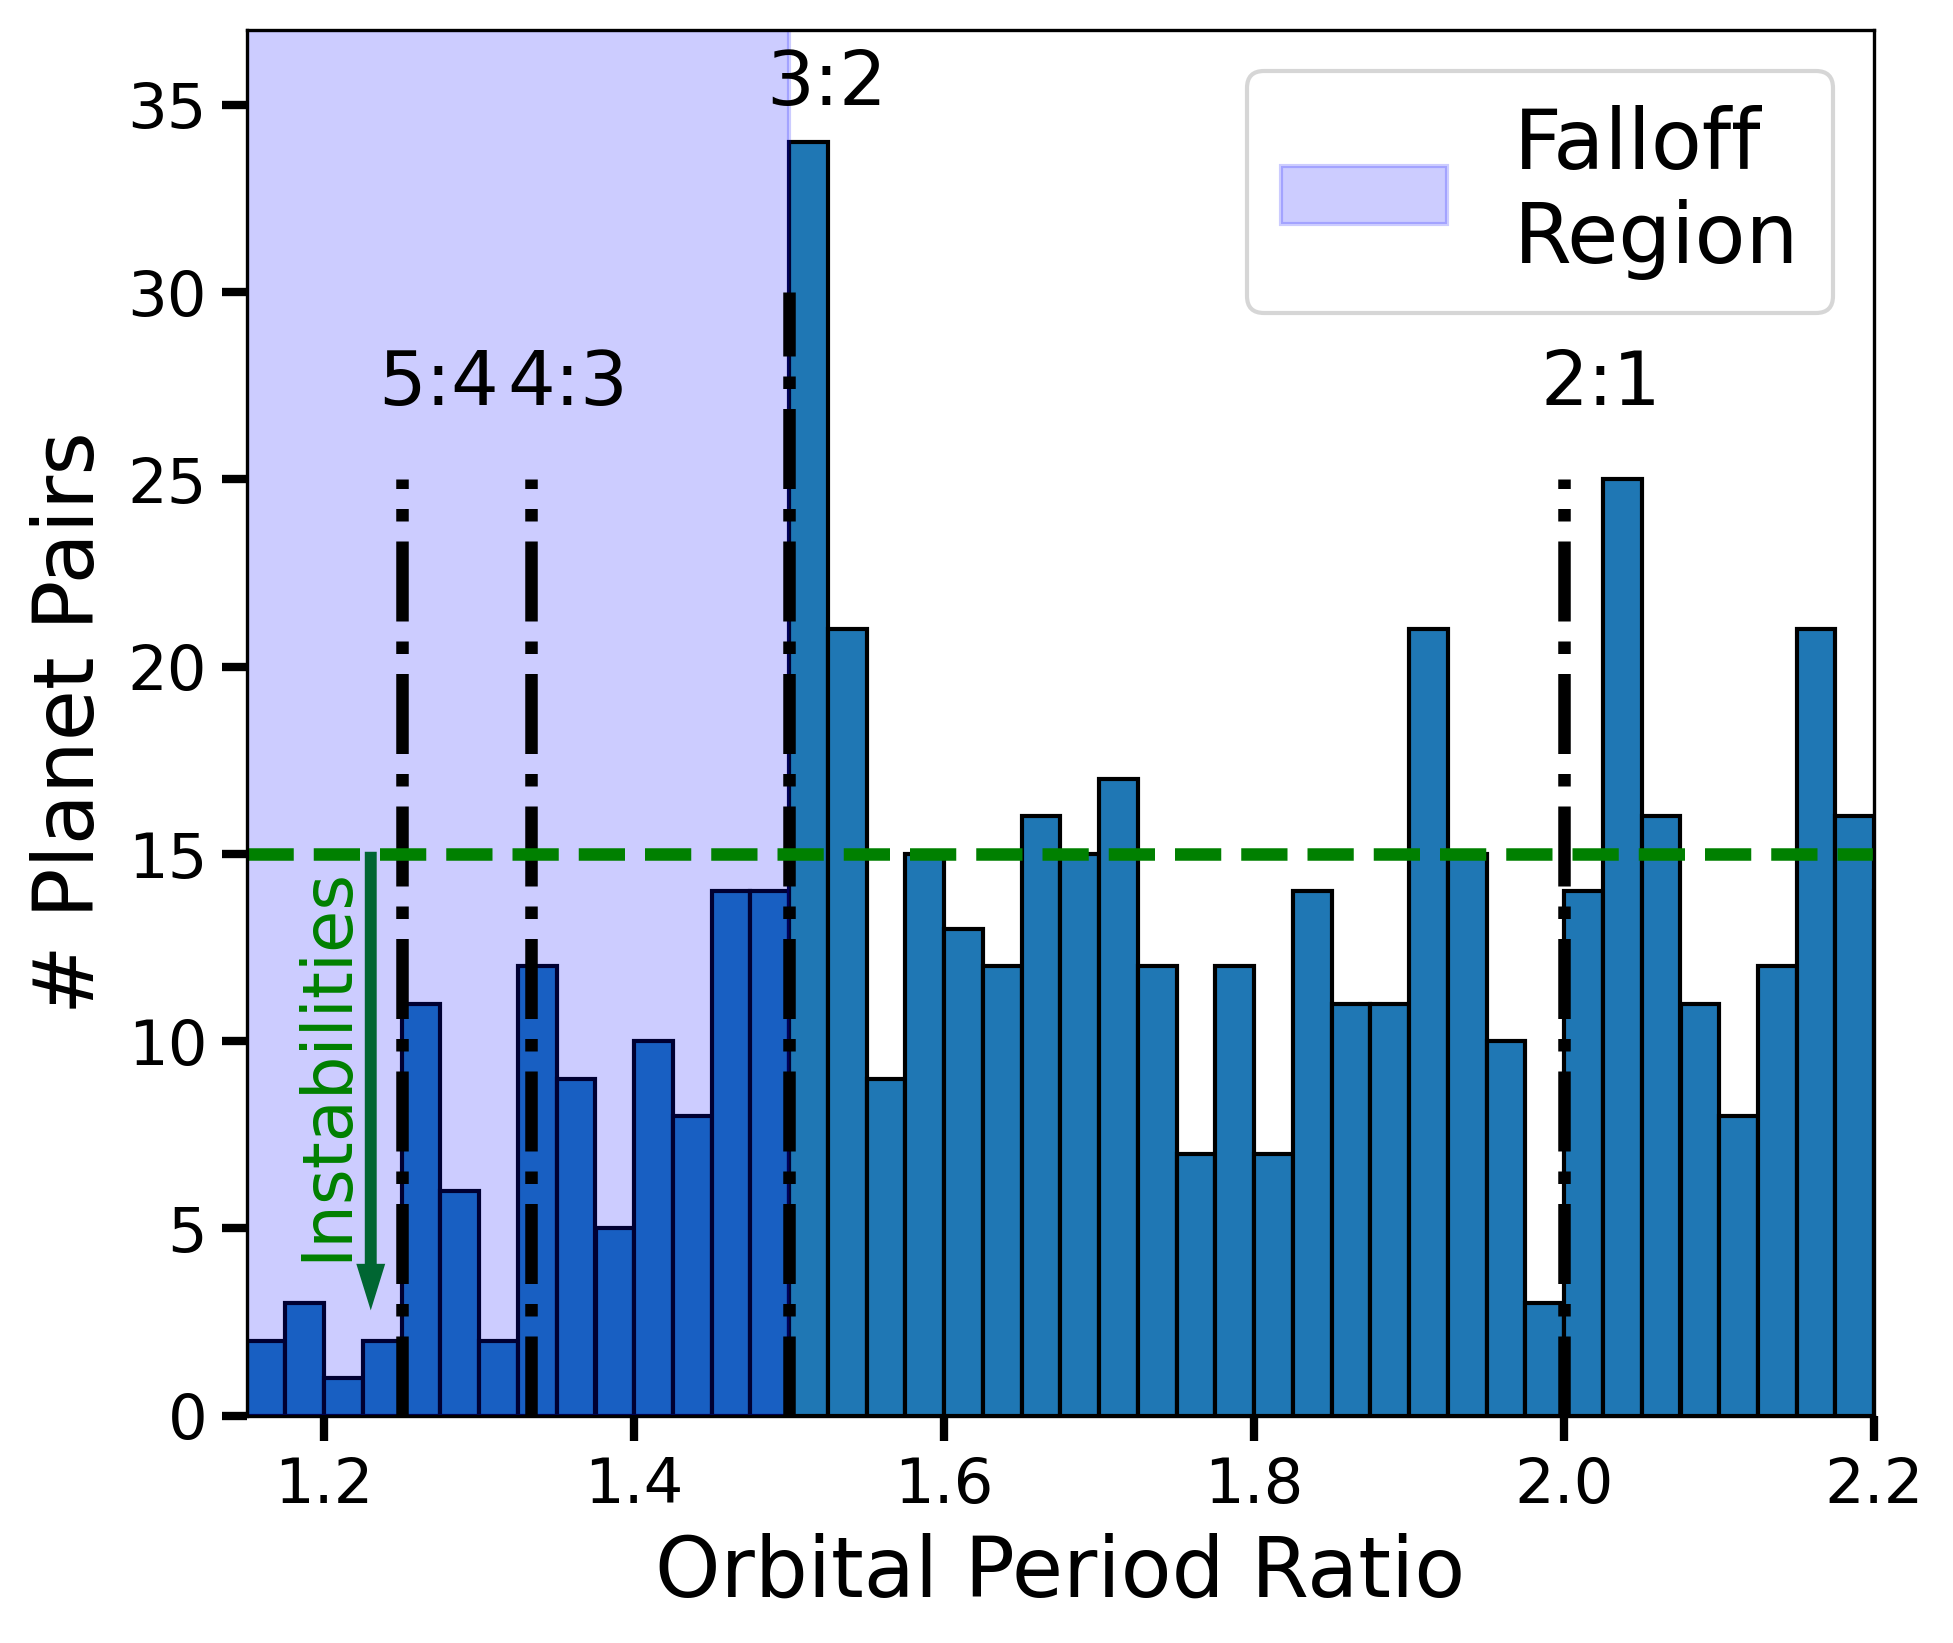

In [304]:
import pandas as pd
plt.style.use('./paper.mplstyle')

pairs = pd.read_csv('exoarchive_planet_pairs.csv', index_col=0)
fig, ax = plt.subplots(figsize=(7,6), dpi = 300)
ax.hist(pairs['Pratio'], fill=True, bins=np.linspace(1.15, 3.25, 85), ec='k',)
ax.set_xlabel('Orbital Period Ratio', fontsize = 20)
ax.set_ylabel('# Planet Pairs', fontsize = 20)
resonances = [(2,1), (3,1), (4,1), (5,1)]
for j,k in resonances:
    Pres = j/(j-k)
    if k == 1 and j != 5 and j!= 4 and j!= 2:
        ax.plot([Pres, Pres], [0, 30], linestyle='-.', color='k')
        ax.text(Pres-0.015, 35, '{0}:{1}'.format(j, j-k), fontsize=18)
    else:
        ax.plot([Pres, Pres], [0, 25], linestyle='-.', color='k')
        ax.text(Pres-0.015, 27, '{0}:{1}'.format(j, j-k), fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x = np.linspace(1.15, 1.5, 85)
y1 = 37
y2 = 0
ax.set_ylim([y2, y1])
ax.set_xlim([1.15, 2.2])
ax.plot([1.15,3.25],[15,15], linestyle='--', color='g')
plt.arrow(1.23,15,0,-11, width = 0.005,head_length=1,color = "g")
ax.fill_between(x,y1,y2,color = "b",alpha = 0.2,label = "Falloff\nRegion")
plt.legend(fontsize="20")
plt.text(1.18,4.5,"Instabilities",rotation = 90,fontsize = 16.5, color ="g")
fig.savefig('mmrs.pdf', bbox_inches='tight')
print("bruh")